#**Project: Cleaning [9000+ Movies Dataset]**

#Features of the dataset:
* **Release_Date**: Date when the movie was released.
* **Title**: Name of the movie.
* **Overview**: Brief summary of the movie.
* **Popularity**: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
* **Vote_Count**: Total votes received from the viewers.
* **Vote_Average**: Average rating based on vote count and the number of viewers out of 10.
* **Original_Language**: Original language of the movies. Dubbed version is not considered to be original language.
* **Genre**: Categories the movie it can be classified as.
* **Poster_Url**: Url of the movie poster.


#Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load Data

In [32]:
#load data and viewing its first 5 rows
df = pd.read_csv("mymoviedb.csv",  lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#Data Wrangling

In [33]:
#Get the number of rows and columns in the dataset
df.shape

(9827, 9)

In [5]:
#Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
#Check for missing values
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [7]:
#Check for duplicates
df.duplicated().sum()

0

In [8]:
#Get the statistical summary
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#Summary after Exploration phase:
> *   The dataset has **9827** rows and **9** columns
*   There is no missing values or duplicated values
* **Release_Date** column has wrong data type, so it has to be casted into **date time** type and leave only the year 
* **Overview** and **Poster_Url** columns are useless during analysis, so we have to drop them











#Data Cleaning 

In [52]:
#drop useless columns
df.drop(columns = ["Overview", "Poster_Url"], inplace = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,English,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,English,Crime
4,2022,The Batman,3827.658,1151,8.1,English,Mystery


**Release_Date Column**

In [34]:
#Cast the Release_Date Column type into datetime type 
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes)

datetime64[ns]


In [35]:
#Extract the year from Release_Date Column
df["Release_Date"] = pd.DatetimeIndex(df["Release_Date"]).year
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [36]:
df["Release_Date"].value_counts()

2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: Release_Date, Length: 102, dtype: int64

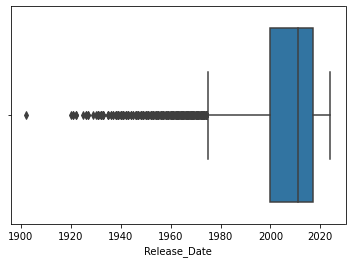

In [37]:
#check for outliers
sns.boxplot(data= df, x = "Release_Date" )

**Vote_Average Column**

In [38]:
df["Vote_Average"].unique()

array([ 8.3,  8.1,  6.3,  7.7,  7. ,  6.6,  6.8,  5.3,  7.2,  5.9,  7.3,
        7.1,  5.1,  4.6,  6. ,  8.2,  5.4,  6.1,  8.4,  6.9,  5.8,  7.4,
        7.8,  8. ,  6.2,  6.7,  7.6,  8.6,  4.8,  5.5,  7.9,  6.4,  7.5,
        5.7,  2.2,  6.5,  0. ,  5.6,  5.2,  5. ,  8.5,  3.5,  4. ,  3.3,
        4.7,  4.2,  4.3,  2. ,  4.1,  4.9,  8.7,  4.5,  9.1,  4.4,  3.6,
        2.8,  3.9,  3.8,  9. ,  3. ,  3.1,  3.7,  3.4,  8.9,  2.9,  8.8,
        3.2,  1.5,  9.2,  2.5,  1.8,  2.4,  2.6, 10. ])

**Genre	Column**

In [39]:
df["Genre"].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [40]:
#Split the genre in each row into lists
df["Genre"] = df["Genre"].str.split(', ')
df["Genre"]

0       [Action, Adventure, Science Fiction]
1                 [Crime, Mystery, Thriller]
2                                 [Thriller]
3       [Animation, Comedy, Family, Fantasy]
4         [Action, Adventure, Thriller, War]
                        ...                 
9822                          [Drama, Crime]
9823                                [Horror]
9824             [Mystery, Thriller, Horror]
9825                 [Music, Drama, History]
9826           [War, Drama, Science Fiction]
Name: Genre, Length: 9827, dtype: object

In [41]:
#Explode the lists
df = df.explode("Genre").reset_index(drop=True)
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [42]:
#Check for the number of rows after the spliting
df.shape

(25793, 9)

**Original_Language Column**

In [19]:
#Check the number of values for each language
df["Original_Language"].value_counts()

en    20019
ja     2025
fr      692
es      659
ko      420
zh      364
cn      299
it      251
ru      229
de      198
pt       72
da       63
no       62
hi       61
sv       58
nl       46
th       45
pl       37
id       35
tr       27
te       15
tl       13
sr       13
fi       12
el        9
cs        8
hu        8
uk        7
is        6
fa        6
ta        5
ro        4
he        4
ar        4
ml        3
eu        3
nb        2
bn        2
ms        2
et        2
ca        1
la        1
lv        1
Name: Original_Language, dtype: int64

In [ ]:
#set the some languages to "other" value
df.Original_Language[~df['Original_Language'].isin(["en","ja","es","fr","ko","zh"])]="Other"

In [44]:
#Rename Original Language column using Language Code Table
df["Original_Language"] = df["Original_Language"].replace({"en": "English", "ja" : "Japanese", "es" : "Spanish", "fr" : "French", "ko" : "Korean", "zh" : "Chinese"})

In [45]:
#Check for unique values after grouping 
df["Original_Language"].unique()

array(['English', 'Japanese', 'French', 'Other', 'Spanish', 'Korean',
       'Chinese'], dtype=object)

#Data Visualization 

**Q1: Which year has the most number of released movies?**

Text(0.5, 1.0, 'Release Date Histogram ')

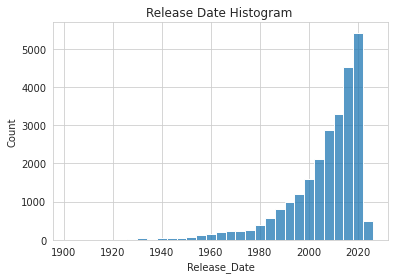

In [46]:
#Visualizing Release Date column
sns.set_style("whitegrid") 
sns.histplot(data= df, x= "Release_Date" , binwidth=4)
plt.title("Release Date Histogram ")

**Q2: What is the language in which movies are made the most in the dataset?**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

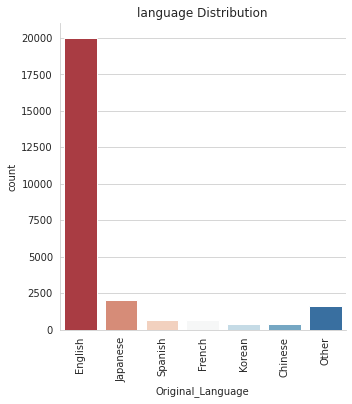

In [47]:
#Visualizing language column
order = ["English", "Japanese",  "Spanish",  "French", "Korean", "Chinese", "Other"]
sns.catplot(data= df,
              x= "Original_Language" ,
              order = order,
            kind = "count",
            palette = "RdBu")
plt.title('language Distribution')
plt.xticks(rotation=90)


**Q3: What is the most popular genre in the dataset?**


In [48]:
#Showing statistical summary about genre column
df["Genre"].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

Text(0.5, 1.0, 'Genre Distribution')

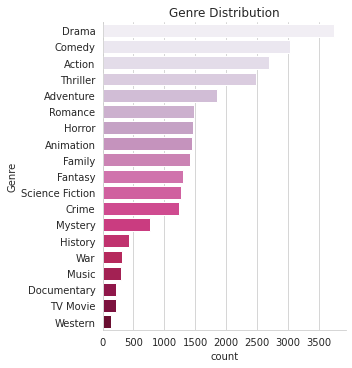

In [55]:
#Visualizing genre column
sns.catplot(y = "Genre", data = df, kind = "count", 
            order = df['Genre'].value_counts().index,
            palette = "PuRd")
plt.title('Genre Distribution')


**Q4: What genres have highest votes?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

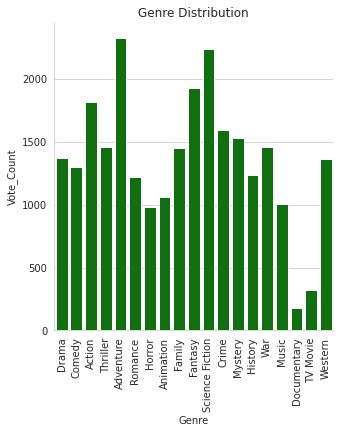

In [58]:
sns.catplot(x = "Genre", y ="Vote_Count", data = df, kind = "bar",
            color= "G"
            ,ci = None)
plt.title("Genre Distribution")
plt.xticks(rotation=90)


**Q5: Which movie got the highest popularity? what's its genre?**

In [53]:
#Check for the highest popularity in the dataset using filtering
df[df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,English,Science Fiction
